In [1]:
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import io
import csv

In [2]:
'''Variação do IPCA em todo o território nacional'''
url_ipca_1991_1999 = 'http://seriesestatisticas.ibge.gov.br/exportador.aspx?arquivo=IA52_BR_PERC.csv&categorias=%22Indice%20geral_Alimentacao%20e%20bebidas_Habitacao_Artigos%20de%20residencia_Vestuario_Transporte%20e%20comunicacao_Saude%20e%20cuidados%20pessoais_Servicos%22&localidade=Brasil'
url_ipca_2012_2016 = 'http://seriesestatisticas.ibge.gov.br/exportador.aspx?arquivo=PC51_BR_PERC.csv&categorias=%22Indice%20geral_1.Alimentacao%20e%20bebidas_2.Habitacao_3.Artigos%20de%20residencia_4.Vestuario_5.Transportes_6.Saude%20e%20cuidados%20pessoais_7.Despesas%20pessoais_8.Educacao_9.Comunicacao%22&localidade=Brasil'

In [3]:
'''Passos para gerar o df_Brasil_1991_99'''
temp = urllib.request.urlopen(url_ipca_1991_1999).read()
temp_2 = temp.decode('utf-8').replace(',','.')
fh = open('temp.csv','w')
fh.write(temp_2)
fh.close()
df_temp=pd.read_csv('temp.csv', delimiter='\t')
a = list(df_temp.columns)
a[0] = 'UF'
df_temp.columns = a
df_temp = df_temp.set_index(['UF', 'OPCAO'])
df_temp = df_temp.T['Brasil']
df_Brasil_1991_99 = df_temp.drop('Indice geral', axis=1)

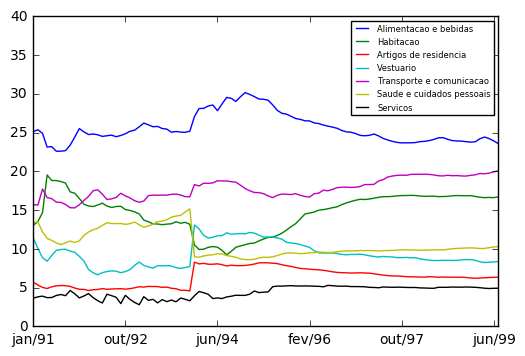

In [4]:
'''Gera o gráfico_1'''
df_Brasil_1991_99.plot()
plt.legend(fontsize=6)
plt.ylim(0,40)
plt.show()

In [5]:
df_Brasil_1991_99.head()

OPCAO,Alimentacao e bebidas,Habitacao,Artigos de residencia,Vestuario,Transporte e comunicacao,Saude e cuidados pessoais,Servicos
jan/91,25.1386,13.0651,5.7204,11.4066,15.7229,13.4197,3.6479
fev/91,25.3759,13.5353,5.3461,10.0452,15.6566,13.4887,3.8188
mar/91,24.9173,14.6925,5.0327,8.8697,17.7319,12.1905,3.9111
abr/91,23.1459,19.5494,4.8982,8.4244,16.6296,11.3660,3.7171
mai/91,23.2031,18.8325,5.1087,9.1491,16.4874,11.1028,3.7314


In [6]:
df_Brasil_1991_99['ano']=df_Brasil_1991_99.index.str.replace("^.*/",'')

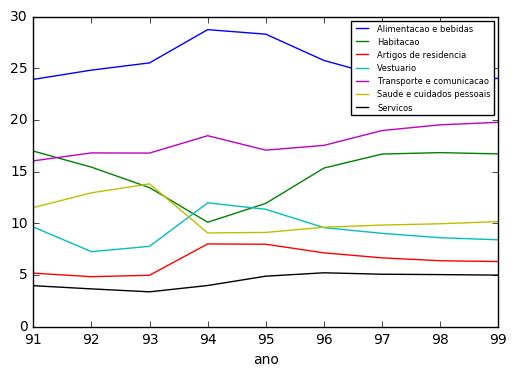

In [8]:
df_Brasil_1991_99.groupby(df_Brasil_1991_99['ano']).mean().plot()
plt.legend(fontsize=6)
plt.show()

In [9]:
temp = io.StringIO(urllib.request.urlopen(url_ipca_2012_2016).read().decode().replace(',','.'))
csv_temp = csv.reader(temp, delimiter='\t')
df_temp = pd.DataFrame(x for x in csv_temp)
df_temp.columns = df_temp.loc[0]
df_temp = df_temp.drop('Brasil', axis=1)
df_temp = df_temp.drop(df_temp.index[0])
df_temp = df_temp.reset_index(drop=True)
df_temp['OPCAO'] = df_temp['OPCAO'].str.replace('^[0-9].','')
df_temp.index = df_temp['OPCAO']
df_temp = df_temp.drop('OPCAO', axis=1)
df_temp_T = df_temp.T
del df_temp_T.index.name
df_Brasil_2012_2016 = df_temp_T
for x in df_Brasil_2012_2016.columns: df_Brasil_2012_2016[x] = pd.to_numeric(df_Brasil_2012_2016[x])    
df_Brasil_2012_2016['ano'] = df_Brasil_2012_2016.index.str.replace('^.*/','')
del df_Brasil_2012_2016.columns.name

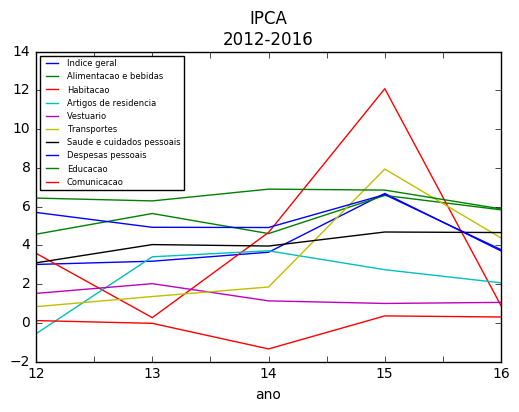

In [10]:
df_Brasil_2012_2016.groupby('ano').mean().plot()
plt.legend(loc=0,fontsize=6)
plt.title('IPCA\n2012-2016')
plt.show()